In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Raw data access

import os
os.chdir('/content/drive/MyDrive/TOM_AJIT_SIR/ML')

#### **Importing the modules** ####

In [18]:
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
ls


22_RNA_Tom_AG_Marker_Prediction_Using_Classification_Pycrate.ipynb  All_Micro_Up_26_Merged_36.csv
26_RNA_Tom_AG_Marker_Prediction_Using_Classification_Pycrate.ipynb  All_Rna_Up_22.csv
All_Micro_Up_26_1.csv                                               logs.log
All_Micro_Up_26.csv


#### **Load Dataset** ####

In [20]:
#TOM_df = pd.read_csv("All_Micro_Up_26.csv", index_col=0)

#TOM_df = pd.read_csv("All_Micro_Up_26_1.csv", index_col=0)

TOM_df = pd.read_csv("All_Micro_Up_26_Merged_36.csv", index_col=0)

In [21]:
display(TOM_df.head())


,Solyc01g105660,Solyc02g061770,Solyc02g062040,Solyc02g084850,Solyc03g098100,Solyc03g098240,Solyc03g121880,Solyc04g005250,Solyc04g009860,Solyc04g071780,...,Solyc08g078040,Solyc08g083110,Solyc09g008350,Solyc09g064820,Solyc09g075820,Solyc12g008840,Solyc12g013620,Solyc12g014100,Solyc12g019740,condition
EnsID,,,,,,,,,,,,,,,,,,,,,
GSM2830490,2.162483,3.716094,4.019602,2.438650,1.281614,3.347039,4.459767,2.401207,7.317725,2.961886,...,6.443212,4.497246,7.501309,2.506175,7.463875,6.605968,7.324414,5.822005,6.341161,0
GSM2830491,2.799077,3.876865,4.380348,3.029307,1.314452,3.457045,4.570778,2.844363,7.367127,3.862324,...,6.413905,4.623884,7.749645,2.510520,7.605979,6.786605,7.426377,5.953465,6.392870,0
GSM2830492,2.404784,4.368876,4.242416,2.438420,1.338375,3.128144,4.535508,2.844518,7.292740,3.634068,...,6.513905,4.550122,7.551571,1.984260,7.641271,6.780943,7.511977,5.794241,6.366657,0
GSM2830493,5.225068,3.078907,4.464217,7.780843,2.141076,3.273180,5.219920,3.393817,7.156610,2.185757,...,6.165738,5.363078,7.696151,5.826135,7.517749,7.321751,7.144286,6.026040,6.932643,1
GSM2830494,5.484272,3.248283,4.775311,7.879612,2.680450,3.523851,5.305147,3.333576,7.246433,2.434275,...,6.164905,5.417109,7.680900,6.216209,7.426938,7.459170,7.392227,6.227233,6.900800,1


#### **Data Preprocessing** ####
##### **Checking null entries** #####

In [22]:
TOM_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, GSM2830490 to GSM412070
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Solyc01g105660  36 non-null     float64
 1   Solyc02g061770  36 non-null     float64
 2   Solyc02g062040  36 non-null     float64
 3   Solyc02g084850  36 non-null     float64
 4   Solyc03g098100  36 non-null     float64
 5   Solyc03g098240  36 non-null     float64
 6   Solyc03g121880  36 non-null     float64
 7   Solyc04g005250  36 non-null     float64
 8   Solyc04g009860  36 non-null     float64
 9   Solyc04g071780  36 non-null     float64
 10  Solyc04g081900  36 non-null     float64
 11  Solyc06g050130  36 non-null     float64
 12  Solyc06g066600  36 non-null     float64
 13  Solyc06g068620  36 non-null     float64
 14  Solyc06g074940  36 non-null     float64
 15  Solyc07g063870  36 non-null     float64
 16  Solyc08g068730  36 non-null     float64
 17  Solyc08g078040  36 non-nul

In [ ]:
# Checking columns having null values
#MPXV_df.isna().sum()

In [ ]:
# Getting the list of columns having missing values
#x = dengue_features.columns[dengue_features.isna().sum() > 0].tolist()
#x

In [ ]:
# Filling the missing value with mean
#for i in x:
#    dengue_features[i] = dengue_features[i].fillna(dengue_features[i].mean())
#dengue_features.head()

##### **merge dataset** #####

In [ ]:
# Adding total cases
#dengue_features['total_cases'] = dengue_labels['total_cases']
#dengue_features.head(3)

##### **Feature Engineering** #####
The dengue cases of San Juan sj and Iquitos iq are not dependent. So splitting them into different DataFrames

In [ ]:
#X_sj = dengue_features[dengue_features['city'] == 'sj']
#X_iq = dengue_features[dengue_features['city'] == 'iq']

In [ ]:
# MPXV_df = MPXV_df.drop(['condition'], axis=1)
#X_iq = X_iq.drop(['city', 'weekofyear', 'week_start_date'], axis=1)

In [ ]:
# display(MPXV_df.head(2))
#display(X_iq.head(2))

In [ ]:
#display(X_sj.head(2))
#display(X_iq.head(2))

##### **Changing the order of columns in X_sj and X_iq DataFrames** #####

In [ ]:
# X_sj.columns

In [ ]:
# X_sj_1 = X_sj.columns[-3:].values.tolist()
# X_sj_2 = X_sj.columns[:15].values.tolist()

In [ ]:
# print(X_sj_1)

In [ ]:
# years = X_sj_1 + X_sj_2
# print(years)

In [ ]:
# X_sj = X_sj[years[::-1]].join(X_sj[X_sj.columns[:24]])
# X_sj.head(100)

In [ ]:
# years = X_iq.columns[:23:-1].values.tolist()
# print(years)
# X_iq = X_iq[years[::-1]].join(X_iq[X_iq.columns[:24]])
# X_iq.head()

In [ ]:
# Removing dummy variable trap
# X_sj = X_sj.drop(1990, axis=1)
# X_iq = X_iq.drop(2000, axis=1)

In [ ]:
# x_sj_arr = X_sj.iloc[:].values
# x_iq_arr = X_iq.iloc[:].values

In [ ]:
# y_sj = X_sj['total_cases'].values
# y_iq = X_iq['total_cases'].values

In [ ]:
# X_sj = X_sj.drop('total_cases', axis=1).values
# X_iq = X_iq.drop('total_cases', axis=1).values

#### **Splitting the dataframes into train and test** ####

In [26]:
!pip install pycaret

In [27]:
# import pycaret classification and init setup
from pycaret.classification import *
setup(TOM_df, target = 'condition', train_size = 0.8, session_id = 123)
# setup(X_iq, target = 'total_cases', train_size = 0.8, session_id = 123)

,Description,Value
0,Session id,123
1,Target,condition
2,Target type,Binary
3,Original data shape,"(36, 27)"
4,Transformed data shape,"(36, 27)"
5,Transformed train set shape,"(28, 27)"
6,Transformed test set shape,"(8, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [28]:
import pycaret
print(pycaret.__version__)


3.3.2


## **Compare Models** ##

In [29]:
# compare baseline models
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1600
dt,Decision Tree Classifier,0.9667,0.9750,1.0000,0.9500,0.9667,0.9400,0.9500,0.0370
rf,Random Forest Classifier,0.9667,1.0000,1.0000,0.9500,0.9667,0.9400,0.9500,0.1880
ada,Ada Boost Classifier,0.9667,0.9750,1.0000,0.9500,0.9667,0.9400,0.9500,0.1100
gbc,Gradient Boosting Classifier,0.9667,0.9750,1.0000,0.9500,0.9667,0.9400,0.9500,0.1050
xgboost,Extreme Gradient Boosting,0.9333,0.9750,0.9000,0.8500,0.8667,0.8400,0.8500,0.0680
lr,Logistic Regression,0.9167,0.9500,1.0000,0.9000,0.9333,0.8400,0.8500,0.7650
lda,Linear Discriminant Analysis,0.8833,0.8000,0.8500,0.8500,0.8333,0.7800,0.8000,0.0310
svm,SVM - Linear Kernel,0.8333,0.9000,0.9000,0.8500,0.8333,0.7000,0.7500,0.0350
ridge,Ridge Classifier,0.8167,1.0000,1.0000,0.7833,0.8500,0.6800,0.7000,0.0370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


## **Create Model**##

In [41]:
# create model
ada = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6667,0.7500,1.0000,0.5000,0.6667,0.4000,0.5000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [42]:
# print model parameters
print(ada)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## **Tune Model** ##

In [52]:
# tune hyperparameters of et
tuned_ada = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6667,1.0000,1.0000,0.5000,0.6667,0.4000,0.5000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [53]:
# print tuned model
print(tuned_ada)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [54]:
tuned_ada

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [55]:
# to access the tuner object you can set return_tuner = True
tuned_ada, tuner = tune_model(ada, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6667,1.0000,1.0000,0.5000,0.6667,0.4000,0.5000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [56]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['Solyc01g105660',
                                                                          'Solyc02g061770',
                                                                          'Solyc02g062040',
                                                                          'Solyc02g084850',
                                                                          'Solyc03g098100',
                                                                          'Solyc03g098240',
                                                                          'Solyc03g121880',
                                                                          'Solyc04g005250...
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140,
                                                                           150,
                                                                           160,
                                                                           170,
                                                                           180,
                                                                           190,
                                                                           200,
                                                                           210,
                                                                           220,
                                                                           230,
                                                                           240,
                                                                           250,
                                                                           260,
                                                                           270,
                                                                           280,
                                                                           290,
                                                                           300],
                                        'actual_estimator__subsample': [0.2,
                                                                        0.25,
                                                                        0.3,
                                                                        0.35,
                                                                        0.4,
                                                                        0.45,
                                                                      

## **Analyze Model** ##

In [43]:
#plot_model(rf, plot = 'residuals')

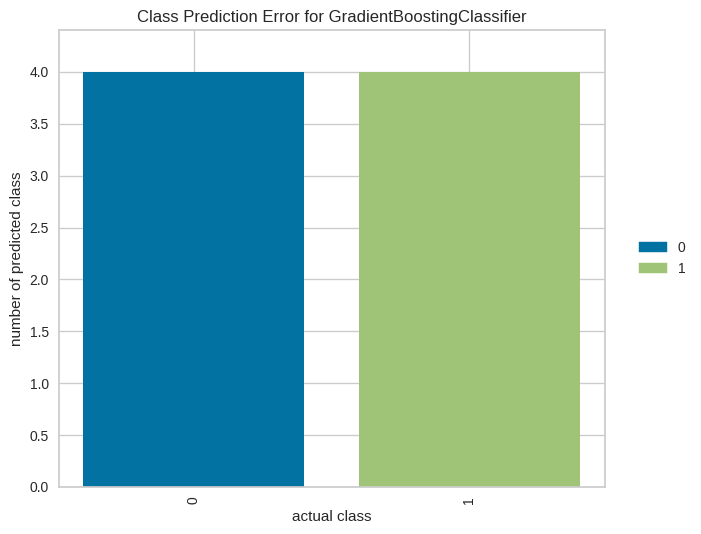

In [57]:
# predicting error plot
plot_model(ada, plot = 'error')

In [45]:
# cooks distance plot
#plot_model(rf, plot = 'cooks')

In [46]:
# recursive feature elemination
#plot_model(ada, plot = 'rfe')

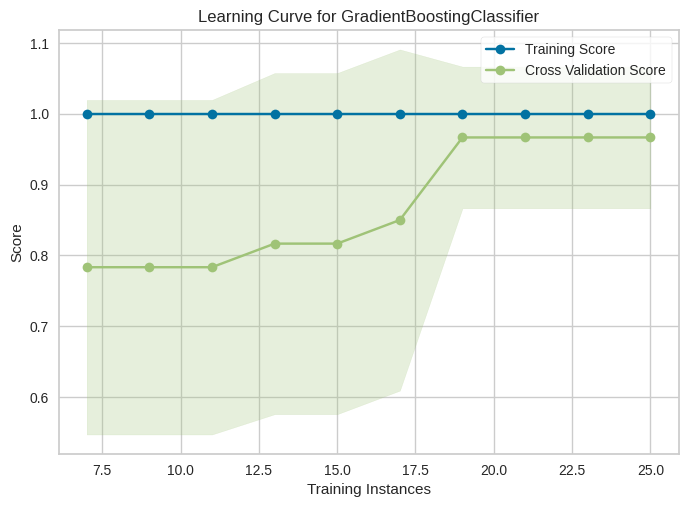

In [58]:
# learning curve
plot_model(ada, plot = 'learning')

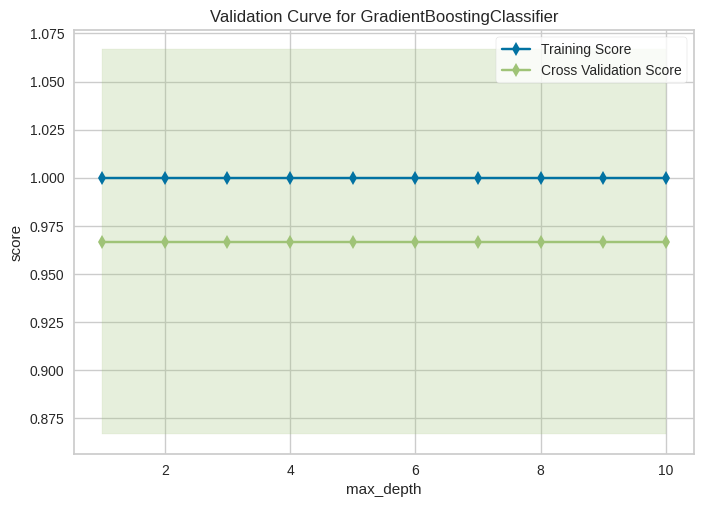

In [59]:
# validation curve
plot_model(ada, plot = 'vc')

In [49]:
# manifold learning plot
#plot_model(rf, plot = 'manifold')

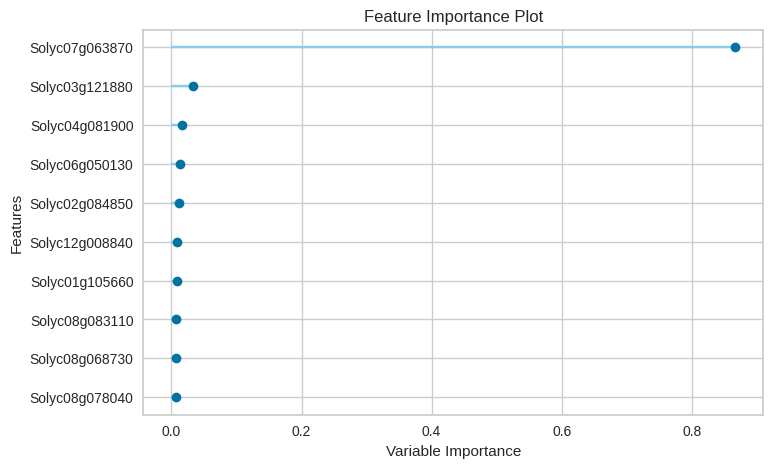

In [60]:
# plot feature importance
plot_model(ada, plot = 'feature')

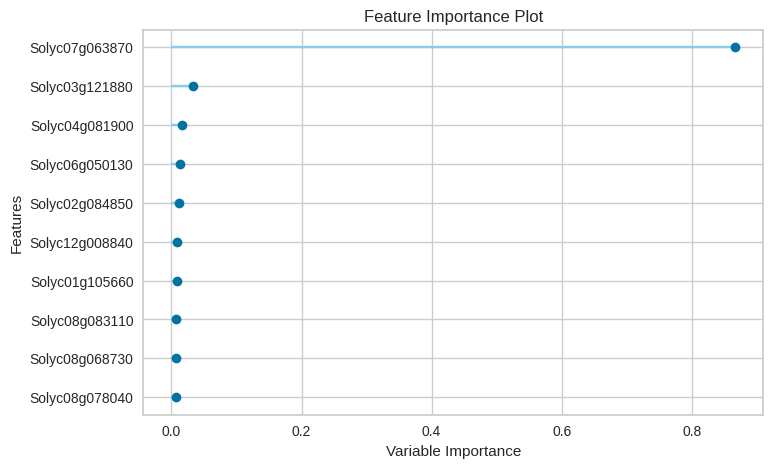

In [51]:
from pycaret.classification import setup, compare_models, create_model, plot_model
import matplotlib.pyplot as plt

# Example data setup (replace with your actual data setup)
# data = ... (load your dataset)
# clf = setup(data, target='target_column')

# Example model creation (replace 'ada' with your actual model)
# ada = create_model('ada')
# Generate the feature importance plot
plot_model(ada, plot='feature')

# Ensure the plot is rendered
plt.gcf().canvas.draw()

# Save the plot as a PDF file
plt.savefig('feature_importance_1.pdf')

# Close the plot window if running interactively
plt.close()


## **Evaluate Model** ##

In [ ]:
# evaluate model
#evaluate_model(rf)

NameError: name 'rf' is not defined

## **Finalize Model** ##

In [ ]:
# finalize a model
finalize_model(rf)

## **Prediction** ##

In [ ]:
# predict on test set
holdout_pred = predict_model(rf)